<a href="https://colab.research.google.com/github/JihunB/AI-Based-Network-Attack-Classification/blob/main/AI_Based_Network_Attack_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. 데이터 불러오고 분석하기

In [ ]:
# trainset 불러오기
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
url = '/content/drive/MyDrive/보안관제/trainset.csv'
data = pd.read_csv(url)

In [ ]:
# 데이터셋 확인
data = pd.read_csv('trainset.csv')
data.head(3)

In [ ]:
# 컬럼이름, null값의 수, 데이터 타입
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220000 entries, 0 to 219999
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   payload       220000 non-null  object
 1   label_action  220000 non-null  object
dtypes: object(2)
memory usage: 3.4+ MB


In [ ]:
# 라벨별 데이터의 수
data['label_action'].value_counts()

,count
label_action,
Brute_Force,135037
normal,44000
Cross_Site_Scripting,16542
SQL_Injection,12525
System_Cmd_Execution,11896


In [ ]:
# 각 공격별 method와 version의 수를 알아보기 위한 컬럼 생성
data1 = data.copy() # 원본 데이터 보존
data1['method'] = data['payload'].str.split().str[0] # method
data1['ver'] = data['payload'].str.split().str[1]    # ver

In [ ]:
# 각 공격일 때 method
for la in ['Brute_Force', 'Cross_Site_Scripting', 'SQL_Injection', 'System_Cmd_Execution', 'normal']:
    print(la, data1[data1['label_action']==la]['method'].value_counts())

Brute_Force method
POST    135037
Name: count, dtype: int64
Cross_Site_Scripting method
GET     16093
POST      449
Name: count, dtype: int64
SQL_Injection method
GET     10378
POST     2147
Name: count, dtype: int64
System_Cmd_Execution method
GET     11567
POST      329
Name: count, dtype: int64
normal method
GET     40544
POST     3456
Name: count, dtype: int64


In [ ]:
# 각 공격일 때 http version
for la in ['Brute_Force', 'Cross_Site_Scripting', 'SQL_Injection', 'System_Cmd_Execution', 'normal']:
    print(la, data1[data1['label_action']==la]['ver'].value_counts())

Brute_Force ver
HTTP/1.0    126385
HTTP/1.1      8652
Name: count, dtype: int64
Cross_Site_Scripting ver
HTTP/1.1    16542
Name: count, dtype: int64
SQL_Injection ver
HTTP/1.1    12525
Name: count, dtype: int64
System_Cmd_Execution ver
HTTP/1.1    11853
HTTP/1.0       43
Name: count, dtype: int64
normal ver
HTTP/1.1    44000
Name: count, dtype: int64


In [ ]:
# 페이로드를 공백 기준으로 나눴을 때 0번 단어의 종류와 수
data['payload'].str.split().str[0].value_counts()

,count
payload,
POST,141418
GET,78582


In [ ]:
data['payload'].str.split().str[1].value_counts()

,count
payload,
HTTP/1.0,126428
HTTP/1.1,93572


In [ ]:
data['payload'].str.split().str[2].value_counts()

,count
payload,
Mozilla/5.0,202338
sqlmap/1.6.10#stable,9280
Mozilla/5.00,4543
sqlmap/1.6.7#stable,3723
-,43
python-requests/2.19.1,34
"Hello,",12
sqlmap/1.5.7#stable,8
python-urllib3/1.26.9,7


In [ ]:
data['payload'].str.split().str[3].value_counts()

,count
payload,
(Hydra),126385
(Windows,29911
(Gecko),22840
(https://sqlmap.org),12987
(compatible;,7740
(Linux,4950
(Nikto/2.1.6),4543
(Intel,1610
(X11;,1594


In [ ]:
data['payload'].str.split().str[4].value_counts()

,count
payload,
/admin/login,125833
NT,28944
Arachni/v10.0.0.80,22840
MSIE,7731
/sub_04_1_read.php,6844
...,...
[j_username=jenkins&j_password=jenkinsadmin&Submit=Sign+in],1
/sub_03_1.php,1
[j_username=jenkinsadmin&j_password=jenkinsadmin&Submit=Sign+in],1


In [ ]:
data['payload'].str.split().str[5].value_counts()

,count
payload,
10.0;,25982
/goods/goods_search,20540
[-],8703
[userid=admin&password=user868!!],7833
[userid=admin&password=user872!!],7820
...,...
[encrypt=p2&return_url=&userid=admin%27%29%20AND%208859%3DDBMS_UTILITY.SQLID_TO_SQLHASH%28%28CHR%28113%29%7C%7CCHR%28107%29%7C%7CCHR%28113%29%7C%7CCHR%28122%29%7C%7CCHR%28113%29%7C%7C%28SELECT%20%28CASE%20WHEN%20%288859%3D8859%29%20THEN%201%20ELSE%200%20END%29%20FROM%20DUAL%29%7C%7CCHR%28113%29%7C%7CCHR%2898%29%7C%7CCHR%28122%29%7C%7CCHR%28107%29%7C%7CCHR%28113%29%29%29%20AND%20%28%27fzcH%27%3D%27fzcH&password=password],1
[userid=test11&password=horse],1
(Test:004649),1


### 2. 전처리

In [ ]:
# sqlmap
def add_sql(data):
    if data.lower().count('sqlmap'):
        return 1
    else:
        return 0

In [ ]:
# word
def add_word(data):
    if data.lower().count('hydra'):
        num = 1
    elif data.lower().count('linux'):
        num = 2
    elif data.lower().count('win'):
        num = 3
    elif data.lower().count('mac'):
        num = 4
    elif data.lower().count('nikto'):
        num = 5
    else:
        num = 0
    return num

In [ ]:
# arachni
def add_ar(data):
    if data.lower().count('arachni'):
        return 1
    else:
        return 0

In [ ]:
# userid
def add_uid(data):
    if data.lower().count('userid'):
        return 1
    else:
        return 0

In [ ]:
# zap
def add_zap(data):
    if data.lower().count('zap'):
        return 1
    else:
        return 0

In [ ]:
# connector
def add_con(data):
    if data.lower().count('connector'):
        return 1
    else:
        return 0

In [ ]:
# applewebkit
def add_apple(data):
    if data.lower().count('applewebkit'):
        return 1
    else:
        return 0

In [ ]:
# 컬럼 만들기
def prepro(data):
    data['method'] = data['payload'].str.split().str[0] # method
    data['ver'] = data['payload'].str.split().str[1]    # ver
    data['sql'] = data['payload'].apply(add_sql)
    data['word'] = data['payload'].apply(add_word)
    data['ar'] = data['payload'].apply(add_ar)
    data['uid'] = data['payload'].apply(add_uid)
    data['connector'] = data['payload'].apply(add_con)
    data['zap'] = data['payload'].apply(add_zap)
    data['apple'] = data['payload'].apply(add_apple)

    # http version 숫자화
    ver_mapping = {'HTTP/1.1':0, 'HTTP/1.0':1}
    data['ver'] = data['ver'].map(ver_mapping)

    # method 숫자화
    method_mapping = {'POST':0, 'GET':1}
    data['method'] = data['method'].map(method_mapping)

    # 데이터셋에서 컬럼 뽑아내 train 데이터 만들기
    tr = data[['method', 'ver', 'word', 'uid', 'ar', 'sql', 'connector', 'zap', 'apple']]

    # 라벨 컬럼 뽑아내기
    if 'label_action' in data.columns:
        tg = data['label_action']
    else :
        tg = []
    return(tr, tg)

### 3. 모델학습

In [ ]:
# 학습 예측
def learn_pred(tr, tg, classifier):
    # stratify : 라벨 비율에 맞춰서 트레인 테스트 만듬
    x_train, x_test, y_train, y_test = train_test_split(tr, tg, test_size=0.2, random_state=42, stratify=tg)

    # 학습, 파라미터 튜닝X
    model = classifier()
    model.fit(x_train, y_train)
    pred = model.predict(x_train)
    print(classifier)
    print(accuracy_score(pred, y_train))
    print(x_train.columns)
    # 예측
    y_pred = model.predict(x_test)
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    return(model, y_pred)

#### RandomForestClassifier

In [ ]:
# 전처리 함수 실행, tr=train, tg=target
tr, tg = prepro(data)

In [ ]:
# 모델 학습시키고 예측 결과 출력
model1, y_pred1 = learn_pred(tr, tg, RandomForestClassifier)

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
0.9266704545454545
Index(['method', 'ver', 'word', 'uid', 'ar', 'sql', 'connector', 'zap',
       'apple'],
      dtype='object')
0.926340909090909
                      precision    recall  f1-score   support

         Brute_Force       0.99      1.00      0.99     27008
Cross_Site_Scripting       0.55      0.87      0.67      3308
       SQL_Injection       1.00      0.87      0.93      2505
System_Cmd_Execution       1.00      0.02      0.04      2379
              normal       0.93      0.99      0.96      8800

            accuracy                           0.93     44000
           macro avg       0.89      0.75      0.72     44000
        weighted avg       0.95      0.93      0.91     44000



<Axes: >

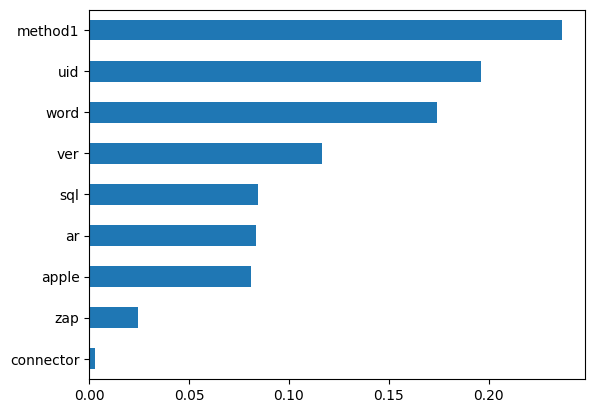

In [ ]:
# RandomForest의 feature 중요도 - connector는 중요도가 낮지만 system_cmd를 분류하는데 큰 역할을 함
importances1 = pd.Series(model1.feature_importances_, tr.columns)
importances1.sort_values().plot.barh()

#### LogisticRegression

In [ ]:
# LogisticRegression
model2, y_pred2 = learn_pred(tr, tg, LogisticRegression)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<class 'sklearn.linear_model._logistic.LogisticRegression'>
0.9164943181818181
Index(['method', 'ver', 'word', 'uid', 'ar', 'sql', 'connector', 'zap',
       'apple'],
      dtype='object')
0.9171136363636364
                      precision    recall  f1-score   support

         Brute_Force       0.99      0.99      0.99     27008
Cross_Site_Scripting       0.52      0.87      0.65      3308
       SQL_Injection       1.00      0.87      0.93      2505
System_Cmd_Execution       1.00      0.02      0.04      2379
              normal       0.92      0.96      0.94      8800

            accuracy                           0.92     44000
           macro avg       0.89      0.74      0.71     44000
        weighted avg       0.94      0.92      0.90     44000



#### XGBOOST

In [ ]:
# xgboost를 위한 라벨 매핑
label_mapping = {'Brute_Force':0, 'normal':1, 'Cross_Site_Scripting':2, 'System_Cmd_Execution':3, 'SQL_Injection':4}
tg_mapping = tg.map(label_mapping)
tg_mapping

,label_action
0,0
1,0
2,1
3,3
4,0
...,...
219995,1
219996,2
219997,0
219998,0


In [ ]:
# xgboost
model3, y_pred3 = learn_pred(tr, tg_mapping, XGBClassifier)

<class 'xgboost.sklearn.XGBClassifier'>
0.9267102272727272
Index(['method', 'ver', 'word', 'uid', 'ar', 'sql', 'connector', 'zap',
       'apple'],
      dtype='object')
0.9261818181818182
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     27008
           1       0.93      0.99      0.96      8800
           2       0.55      0.87      0.67      3308
           3       1.00      0.02      0.04      2379
           4       1.00      0.87      0.93      2505

    accuracy                           0.93     44000
   macro avg       0.89      0.75      0.72     44000
weighted avg       0.95      0.93      0.91     44000



In [ ]:
# test데이터 불러오기, tg2는 의미 없음
test_data = pd.read_csv('/content/drive/MyDrive/보안관제/testset.csv')
tr2, tg2 = prepro(test_data)

In [ ]:
# RandomForest
test_pred1 = model1.predict(tr2)
result_RF = pd.DataFrame(test_pred1, columns = ['label_action'])
result_RF.to_csv('result_RF.csv', index=False)

In [ ]:
# LogisticRegression
test_pred2 = model2.predict(tr2)
result_LR = pd.DataFrame(test_pred2, columns = ['label_action'])
result_LR.to_csv('result_LR.csv', index=False)

In [ ]:
# XGBoost
test_pred3 = model3.predict(tr2)
result_XGB = pd.DataFrame(test_pred3, columns = ['label_action'])
result_XGB.to_csv('result_XGB.csv', index=False)